In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Open file

In [2]:
df = pd.read_csv("data/btc_ltc.csv", sep=";", index_col=0, parse_dates=[1], infer_datetime_format=True)

In [3]:
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,2020-02-17 00:30:59,0.007463,0.007463,0.007463,0.007463,0.000000,0.000000,0.007463
1,2020-02-17 00:45:00,0.007480,0.007430,0.007470,0.007442,2.587243,347.497942,0.007445
2,2020-02-17 01:00:00,0.007445,0.007400,0.007445,0.007437,1.772896,239.289553,0.007409
3,2020-02-17 01:15:00,0.007435,0.007405,0.007435,0.007425,0.194541,26.202608,0.007424
4,2020-02-17 01:30:00,0.007435,0.007408,0.007425,0.007408,0.087922,11.827702,0.007434


## Optimization Parameters

In [4]:
n = 100
w = 25
P = 3e-4

## Structure data

In [5]:
from modules.analysis import Analysis, peak_under_window

In [6]:
analysis = Analysis(df)

In [7]:
df2 = analysis.trend(n, w, p=P)

In [8]:
df2.head()

,high,low,open,close,volume,quoteVolume,weightedAverage,normalized close,ema,trend,trend change
date,,,,,,,,,,,
2020-02-17 00:30:59,0.007463,0.007463,0.007463,0.007463,0.000000,0.000000,0.007463,0.791902,0.791902,1,False
2020-02-17 00:45:00,0.007480,0.007430,0.007470,0.007442,2.587243,347.497942,0.007445,0.784645,0.791758,1,False
2020-02-17 01:00:00,0.007445,0.007400,0.007445,0.007437,1.772896,239.289553,0.007409,0.782629,0.791577,1,False
2020-02-17 01:15:00,0.007435,0.007405,0.007435,0.007425,0.194541,26.202608,0.007424,0.778526,0.791319,1,False
2020-02-17 01:30:00,0.007435,0.007408,0.007425,0.007408,0.087922,11.827702,0.007434,0.772361,0.790943,1,False


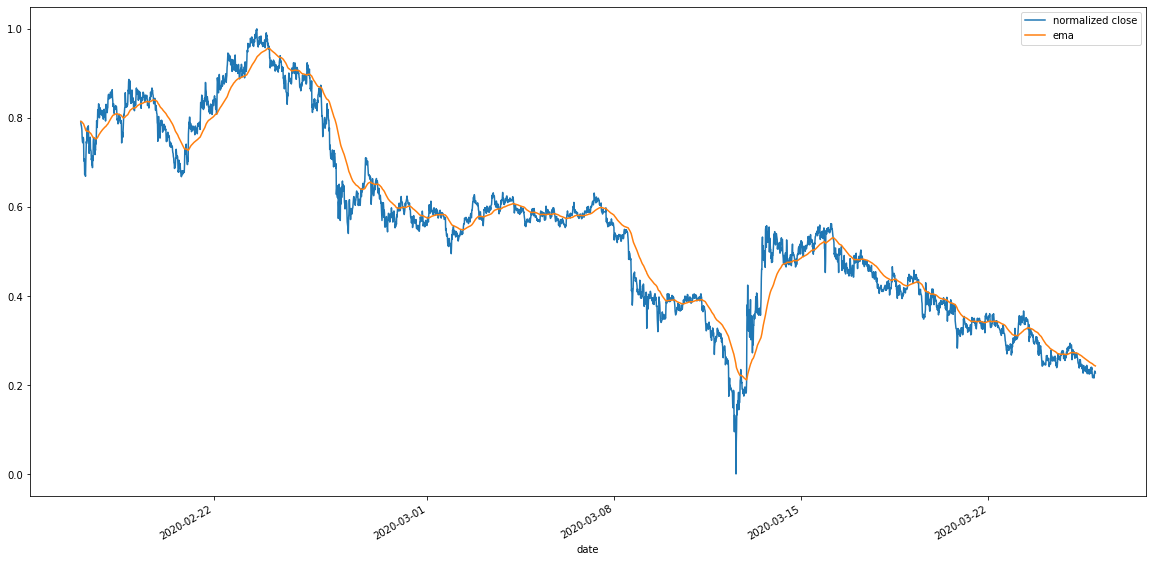

In [9]:
df2[['normalized close', 'ema']].plot(figsize=(20,10))

## Visualize trend

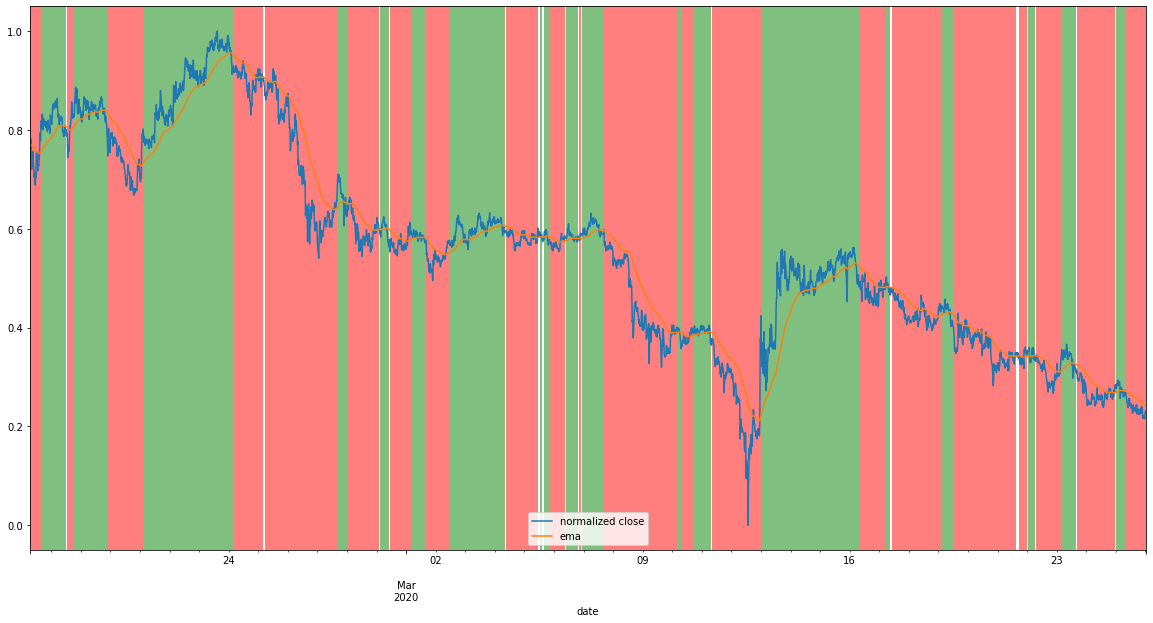

In [10]:
axes = df2[['normalized close', 'ema']].iloc[w:,:].plot(figsize=(20,10))
for i, j in zip(df2.index, df2.index[1:]):
    if df2.loc[i, "trend"] == -1:
        color = "r"
    elif df2.loc[i, "trend"] == 1:
        color = "g"
    else:
        color = "w"
    axes.axvspan(i, j, 0, 1, facecolor=color, alpha=0.5)

## Measuring profit
1. trend < 0: leverage trade with polo% (margin trading)
2. trend > 0: buy all
3. trend == 0: finish orders

In [11]:
df3 = analysis.profit(df2, stop_loss=0.85)

In [12]:
df3.head()

,close,trend,profit
date,,,
2020-02-17 06:45:00,0.007340,-1,0.850000
2020-02-17 16:45:00,0.007570,1,0.982611
2020-02-18 12:15:00,0.007452,0,1.000000
2020-02-18 12:30:00,0.007470,-1,0.850000
2020-02-18 18:30:00,0.007565,0,1.000000


In [13]:
df3.profit.prod()

0.03394785034067196

In [14]:
df3[df3.profit > 1]

,close,trend,profit
date,,,
2020-02-21 03:00:00,0.007415,1,1.054058
2020-03-02 10:30:00,0.006841,1,1.008530
2020-03-13 00:00:00,0.006425,1,1.023800
